In [1]:
!python -m pip install --upgrade pip
!pip install numpy matplotlib black

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [38]:
import numpy as np
import matplotlib.pyplot as plt
image_name = "../map.png"

def plot_transformed_positions(frames):
    plt.figure(figsize=(8, 8))  # Adjust the figsize as needed for a taller plot
    initial_position = np.array([0, 0, 0, 8.35])  # Calibrate
    im = plt.imread(image_name)
    implot = plt.imshow(im)
    
    for frame in frames:
        transform_matrix = np.array(frame["transform_matrix"])
        
        # Apply the transformation matrix to the initial position
        transformed_position = np.dot(transform_matrix, initial_position)

        # Extract the x and y coordinates
        x, _, z, _ = transformed_position
        
        # scale to map
        

        # Plot the transformed position + offset
        plt.scatter([-z+1060], [780+x], s=20) # calibrate
    
    plt.xlabel('-Z (Forward)')
    plt.ylabel('X (Left)')
    plt.title('2D Visualization of Transformed Positions (Top-Down View)')
    plt.grid(True, color='green', linestyle='dashed')  # Green stippled color grid
    plt.gca().set_aspect('equal')  # Set aspect ratio to make grid taller
    plt.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


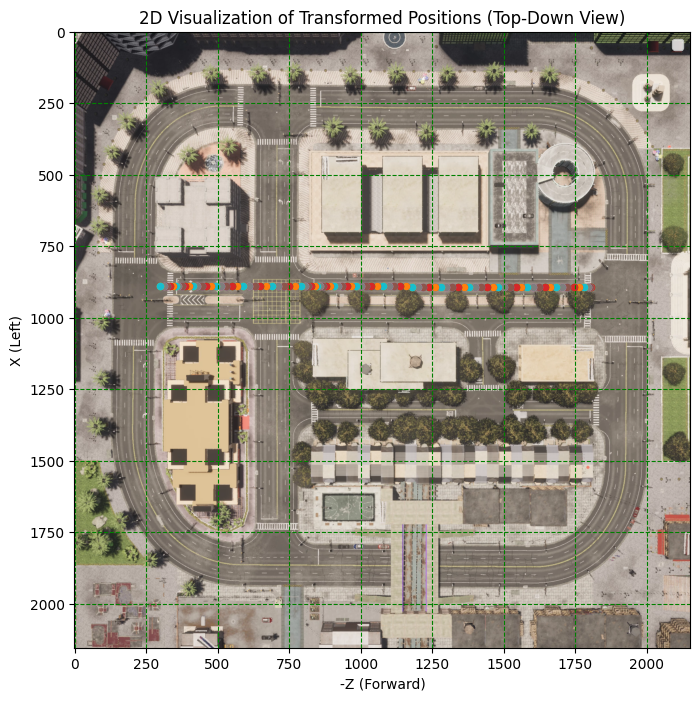

In [39]:
# Read data from transforms.json
with open('../runs/exp_test/0/transforms.json') as f:
    data = json.load(f)
    frames = data["frames"]

# Plot transformed positions
plot_transformed_positions(frames)